# PREDICTING CREDIT RISK

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
lending_df = pd.read_csv(r'C:\Users\GLORY COMPUTERS\Documents\datasets\lending_data.csv')
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [4]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [5]:
lending_df.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

The dataset does not contain any null values and consists of integers or floats, so minimal data cleansing is required before testing.

C:\Users\GLORY COMPUTERS\AppData\Local\Temp\ipykernel_12352\661269166.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  lending_df.hist(ax=ax)


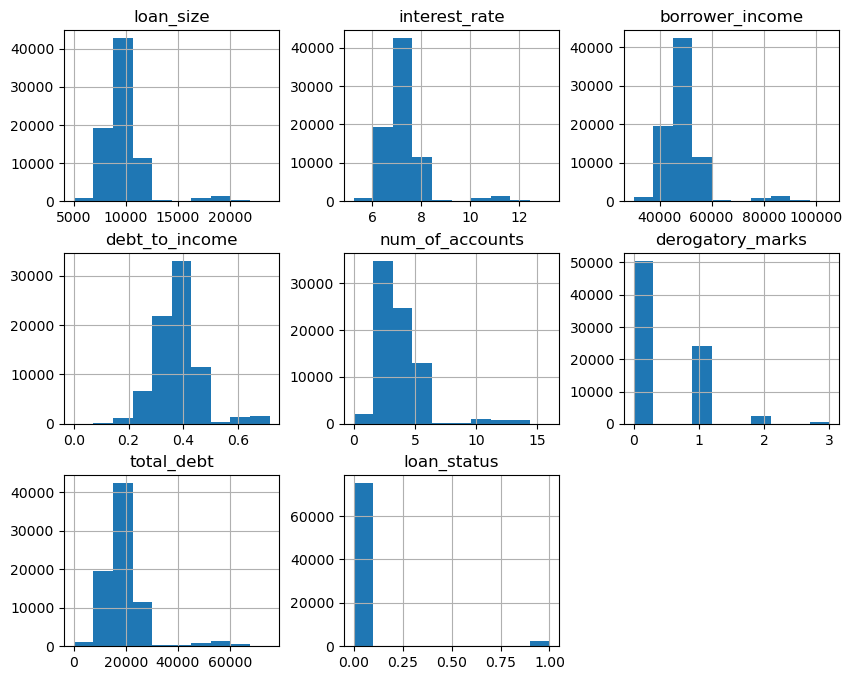

In [6]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
lending_df.hist(ax=ax)
plt.show()

The data presents a positive trend which is shown with the use of a histogram.

**Logistic Regression Model**

In [7]:
# Split data into train and test
#Train Logistic Regression model
#Train Random Forest Classifier model

from sklearn.model_selection import train_test_split
y = lending_df['loan_status'].values
X = lending_df.drop('loan_status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [8]:
np.unique(y)

array([0, 1], dtype=int64)

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
logistic_regression = classifier.fit(X_train, y_train)

print(f"Training Data Score: {logistic_regression.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [11]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [12]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (563 + 18663) / (563 + 102 + 18663 + 56)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



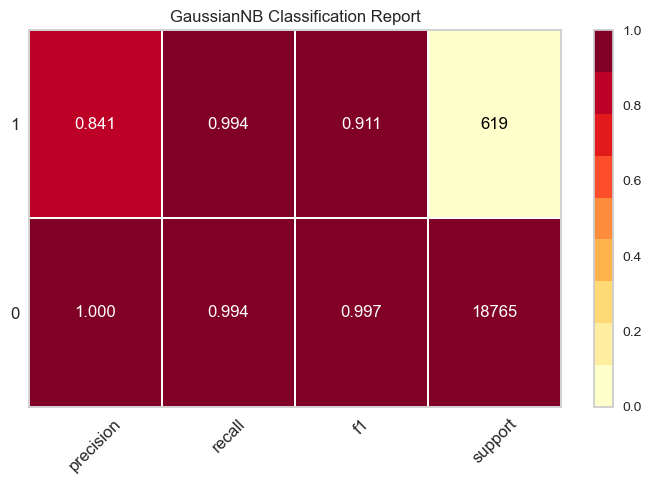

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [15]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, support=True, size=(720, 500))

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show() 

**RandomForestClassifier model**

In [17]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


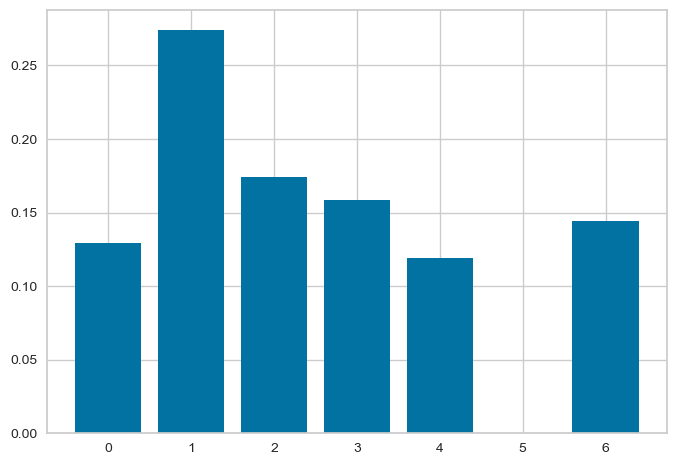

In [18]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [19]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [20]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\GLORY COMPUTERS\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [21]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [22]:
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


**Summary**

*After testing the two models head to head, it's clear that logistic regression presents a higher level of accuracy.

*Comparing traditional classification report with the use of GaussianNB Classification Report, interestingly presents slightly different data.

*When both training and testing scores were compared, it became clear that there is no significant difference between the two models.
    
*The bar chart provides a visual representation of the features. Interestingly, Feature 5 performed the worst while Feature 1 performed significantly better.

*Overall, both models show signs of positive trends. Although there wasn't a significant difference between both training models, it is clear Logistic 
Regression Model peformed better than the Random Forest Classifier